# Store range effect in purchase

In this notebook we explore a data set of customers and its purchases in different stores

Import needed libraries

In [1]:
import pandas as pd
import os
import numpy as np

import matplotlib 

import matplotlib.pyplot as plt

# For statistical tests
import scipy.stats as st

%matplotlib inline

from sklearn.cluster import KMeans

#from sklearn.cross_validation import train_test_split

Read data, drop NA's and get number of records (customers)

In [2]:
data = pd.read_csv('data.csv')
data = data.dropna()
num_customers = data.shape[0]
print num_customers

60365


In [3]:
data.head()

,customer_id,avg_distance_to_shops,min_distance_to_shops,max_distance_to_shops,products_purchased,unique_products_purchased,amount_purchased,avg_purchase,avg_price,shops_used,...,avg_purchase_shop_1,avg_purchase_shop_2,avg_purchase_shop_3,avg_purchase_shop_4,avg_purchase_shop_5,avg_price_shop_1,avg_price_shop_2,avg_price_shop_3,avg_price_shop_4,avg_price_shop_5
0,1,1434.91910,985.87620,4082.5222,3090,473,7551.701,14.221659,3.150493,2,...,10.441143,14.862848,0.000000,0,0.000000,6.393403,2.600485,0.000000,0,0.000000
1,2,909.76764,254.94832,2295.4840,4508,486,7820.219,11.235947,2.191422,4,...,3.761943,4.848720,2.546600,0,16.479185,2.851152,2.009863,2.059450,0,2.103394
2,3,1498.94700,754.29560,2831.7727,814,234,1788.613,5.453088,2.258994,4,...,3.757062,5.605183,1.923385,0,5.924268,3.426687,2.478529,1.923385,0,1.947067
3,4,561.65900,362.79178,2210.3820,648,208,1679.520,5.976940,2.614292,4,...,4.997400,2.688400,5.029184,0,7.156351,4.997400,2.688400,2.083168,0,2.754427
4,5,605.36280,275.46753,1375.1184,13,10,17.922,1.792200,1.692000,2,...,0.000000,0.967667,2.145571,0,0.000000,0.000000,0.633667,2.145571,0,0.000000


In [4]:
data.columns.values

array(['customer_id', 'avg_distance_to_shops', 'min_distance_to_shops',
       'max_distance_to_shops', 'products_purchased',
       'unique_products_purchased', 'amount_purchased', 'avg_purchase',
       'avg_price', 'shops_used', 'distance_shop_1', 'distance_shop_2',
       'distance_shop_3', 'distance_shop_4', 'distance_shop_5',
       'products_purchased_shop_1', 'products_purchased_shop_2',
       'products_purchased_shop_3', 'products_purchased_shop_4',
       'products_purchased_shop_5', 'unique_products_purchased_shop_1',
       'unique_products_purchased_shop_2',
       'unique_products_purchased_shop_3',
       'unique_products_purchased_shop_4',
       'unique_products_purchased_shop_5', 'amount_purchased_shop_1',
       'amount_purchased_shop_2', 'amount_purchased_shop_3',
       'amount_purchased_shop_4', 'amount_purchased_shop_5',
       'avg_purchase_shop_1', 'avg_purchase_shop_2', 'avg_purchase_shop_3',
       'avg_purchase_shop_4', 'avg_purchase_shop_5', 'avg_price_sho

Let's get the distribution of average purchases in store according to shops (in this case five stores)

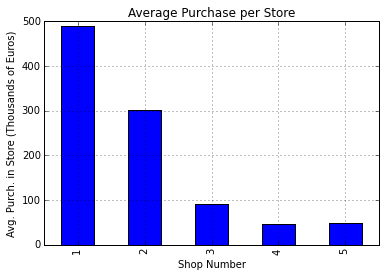

In [5]:
list_purchase = []
for k in range(1,6):
    text_ = 'avg_purchase_shop_' + str(k)
    aux_ = data[text_].sum()/1000.
    list_purchase.append(aux_)
dfAux = pd.DataFrame()
dfAux['Store Number'] = [1,2,3,4,5]
dfAux['Avg. Purchase in Shop'] = list_purchase

dfAux.plot(x='Store Number',y='Avg. Purchase in Shop',kind='bar',
           title='Average Purchase per Store',legend=False,grid=True)
plt.xlabel('Shop Number')
plt.ylabel('Avg. Purch. in Store (Thousands of Euros)')
plt.show()

The previous graph shows that the most profitable store is store number 1. In what follows we will try to figure out why but for the time being let's keep doing exploratory data analysis.

We now show distribution of customers according to the number of shops they use when they purchase

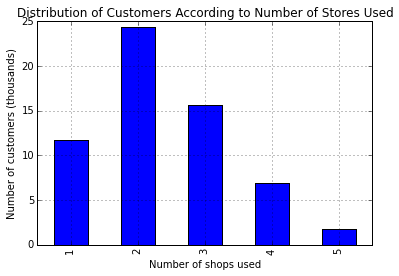

In [6]:
list_purchase = []
for k in range(1,6):
    aux_ = sum(data['shops_used']== k)
    perc_ = float(aux_/1000.)
    list_purchase.append(perc_)
dfAux = pd.DataFrame()
dfAux['Number of Shops Used'] = [1,2,3,4,5]
dfAux['Number of Customers'] = list_purchase

dfAux.plot(x='Number of Shops Used',y='Number of Customers',kind='bar',
           title='Distribution of Customers According to Number of Stores Used',
           legend=False,grid=True)
plt.xlabel('Number of shops used ')
plt.ylabel('Number of customers (thousands)')
plt.show()

The previous bar plot reveals that the majority of clients utilize exactly two stores, follows by customers that utilize exactly two and then the ones that use exactly one. The minority utilize exactly four and five stores so we will focus on the ones that use exactly one, two and three stores.

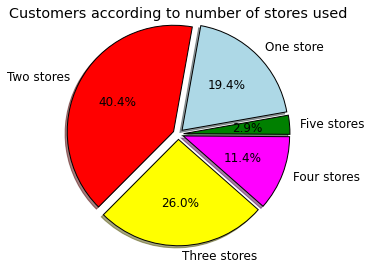

In [7]:
list_purchase = []
labels_ = ["One store","Two stores","Three stores","Four stores","Five stores"]
colors = ['lightblue','red','yellow','magenta','green']
explode = (0.05,0.05,0.05,0.05,0.05)
for k in range(1,6):
    aux_ = sum(data['shops_used']== k)
    perc_ = float(aux_)
    list_purchase.append(perc_)
list_purchase = np.array(list_purchase) 
list_purchase = list_purchase*100./sum(list_purchase)

    
matplotlib.rcParams.update({'font.size': 12})
plt.pie(list_purchase,explode=explode,colors=colors,labels=labels_,
        autopct='%1.1f%%',shadow=True,startangle=10)

plt.axis('equal')

plt.title('Customers according to number of stores used')

plt.show()


We now let's show the distribution of customers according to the shop number

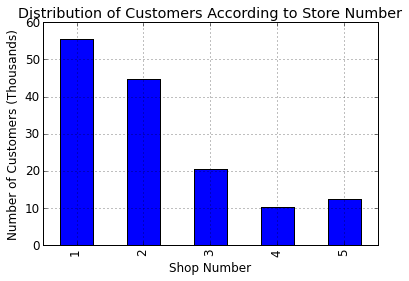

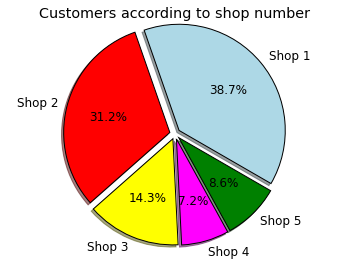

In [8]:
list_purchase = []
for k in range(1,6):
    text_ = 'avg_price_shop_' + str(k)
    aux_ = sum(data[text_] <> 0)
    perc_ = float(sum(data[text_] <> 0)/1000.)
    list_purchase.append(perc_)
dfAux = pd.DataFrame()
dfAux['Shop Number'] = [1,2,3,4,5]
dfAux['Number of Customers'] = list_purchase

dfAux.plot(x='Shop Number',y='Number of Customers',kind='bar',
           title='Distribution of Customers According to Store Number',
           legend=False,grid=True)
plt.xlabel('Shop Number')
plt.ylabel('Number of Customers (Thousands)')
plt.show()

# Pie chart

labels_ = ["Shop 1","Shop 2","Shop 3","Shop 4","Shop 5"]
colors = ['lightblue','red','yellow','magenta','green']
list_purchase = np.array(list_purchase) 
list_purchase = list_purchase*100./sum(list_purchase)
 
matplotlib.rcParams.update({'font.size': 12})
plt.pie(list_purchase,explode=explode,colors=colors,labels=labels_,
        autopct='%1.1f%%',shadow=True,startangle=-30)

plt.axis('equal')

plt.title('Customers according to shop number')

plt.show()




In what follows we will add to our data frame two columns. One of them will indicate the number of store that is closest to customer while the other will indicate what shop is the farthest. For this goal we first remind ourselves of what the relevant fields are.

In [9]:
data[['distance_shop_1', 'distance_shop_2',
       'distance_shop_3', 'distance_shop_4', 'distance_shop_5']].head()

,distance_shop_1,distance_shop_2,distance_shop_3,distance_shop_4,distance_shop_5
0,4082.5222,985.8762,2372.09700,4929.8047,3284.38670
1,1115.3433,2295.4840,670.90080,2048.0605,254.94832
2,1418.8348,2831.7727,1286.81900,1545.1963,754.29560
3,1104.3829,2210.3820,617.28710,2181.6853,362.79178
4,1913.7630,1375.1184,275.46753,2961.3035,1172.37730


Let's now transform the previous data frame to a numpy array for further calculations

In [10]:
dist_ = data[['distance_shop_1', 'distance_shop_2',
       'distance_shop_3', 'distance_shop_4', 'distance_shop_5']].values
print dist_

[[ 4082.5222    985.8762   2372.097    4929.8047   3284.3867 ]
 [ 1115.3433   2295.484     670.9008   2048.0605    254.94832]
 [ 1418.8348   2831.7727   1286.819    1545.1963    754.2956 ]
 ..., 
 [  938.86285  2375.3333    785.6533   2044.8994    247.7872 ]
 [ 1727.252    1846.5889   1124.2445   3185.135    1456.6217 ]
 [ 1025.5867   3444.8223   1823.8531    869.9029    959.00525]]


We finally add the two aforementioned columns...

In [11]:
# Empty lists
closest = []
farthest = []
# For every customer (columns in previous matrix )...
for k in range(num_customers):
    # ... find the index that corresponds to the maximum and minimum 
    # distances and add one to it (remember indexing in Python begins
    # at zero while the indexing at customer number begins at one) ...
    Min = 1 + dist_[k,:].argmin()
    Max = 1 + dist_[k,:].argmax()
    #  ... and add each value to corresponding list
    closest.append(Min)
    farthest.append(Max)
# Finally add columns to the data frame
data['closest_shop'] = closest
data['farthest_shop'] = farthest

We check the previous actions took place

In [12]:
data[['distance_shop_1', 'distance_shop_2',
       'distance_shop_3', 'distance_shop_4', 'distance_shop_5','closest_shop',
      'farthest_shop']].head()

,distance_shop_1,distance_shop_2,distance_shop_3,distance_shop_4,distance_shop_5,closest_shop,farthest_shop
0,4082.5222,985.8762,2372.09700,4929.8047,3284.38670,2,4
1,1115.3433,2295.4840,670.90080,2048.0605,254.94832,5,2
2,1418.8348,2831.7727,1286.81900,1545.1963,754.29560,5,2
3,1104.3829,2210.3820,617.28710,2181.6853,362.79178,5,2
4,1913.7630,1375.1184,275.46753,2961.3035,1172.37730,3,4


We now see distribution of customers according to closeness to store

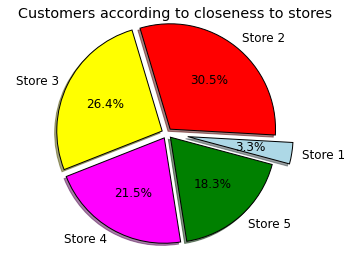

In [13]:
# Reference for pie chart: https://www.getdatajoy.com/examples/python-plots/pie-chart
list_purchase = []
labels_ = ["Store 1","Store 2","Store 3","Store 4","Store 5"]
colors = ['lightblue','red','yellow','magenta','green']
explode = (0.2,0.05,0.05,0.05,0.05)
for k in range(1,6):
    aux_ = sum(data['closest_shop'] == k)
    perc_ = float(aux_)*100./float(num_customers)
    list_purchase.append(perc_)

    
matplotlib.rcParams.update({'font.size': 12})
plt.pie(list_purchase,explode=explode,colors=colors,labels=labels_,
        autopct='%1.1f%%',shadow=True,startangle=-15)

plt.axis('equal')

plt.title('Customers according to closeness to stores')

plt.show()



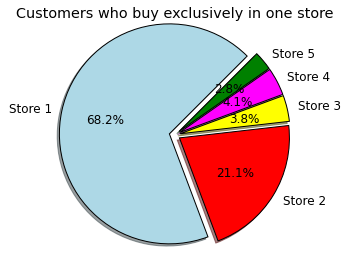

In [14]:
# Reference for pie chart: https://www.getdatajoy.com/examples/python-plots/pie-chart
list_purchase = []
labels_ = ["Store 1","Store 2","Store 3","Store 4","Store 5"]
colors = ['lightblue','red','yellow','magenta','green']
explode = (0.05,0.05,0.05,0.05,0.05)
text_ = 'avg_purchase_shop_'
num_ = sum((data['shops_used'] == 1))
for k in range(1,6):
    aux_ = sum((data[text_ + str(k)] != 0) & (data['shops_used'] == 1))
    perc_ = float(aux_)*100./float(num_)
    list_purchase.append(perc_)

    
matplotlib.rcParams.update({'font.size': 12})
plt.pie(list_purchase,explode=explode,colors=colors,labels=labels_,
        autopct='%1.1f%%',shadow=True,startangle=45)

plt.axis('equal')

plt.title('Customers who buy exclusively in one store')

plt.show()




The previous bar plot reveals that the majority of customers live closest to store 2 while the minorty live closest to store 1. This is something that deserves more exploration since the store that generated the highest revenue, on average, is store 1. Keep in mind that that bar plot showing the average purchase per store does not exclude customers that buy **exclusively** in that store. That is, people who by in store 1 may also buy in other stores. 
Let's then analyse this further.

We now analyse, of the people who purchase in a given store, what fraction of them live closest to such given store.

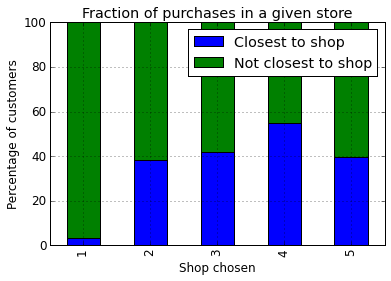

In [15]:
# Fraction of people who purchse in a given store that live closest to it

# Set empty lists and empty data frame
listA = []; listB = []
df_stack = pd.DataFrame()
# Auxiliary test to extract desired values
text_ = 'amount_purchased_shop_'
# For each of the five stores...
for k in range(1,6):
    # ... the total number of customers who purchased at 
    # the store in turn ...
    a = sum((data[text_ + str(k)] != 0.)) 
    # ... and from that total number, get the ones that ALSO live 
    # closest to the store in turn.
    b = sum((data[text_ + str(k)] != 0.) & (data.closest_shop == k))
    
    # From the customers who purchase at a given store we determine the 
    # fraction of them that live the closest to the store in question
    fract_ = float(b)/float(a)
    # Store the complement (the ones who DO NOT live closest to store)...
    listA.append((1. - fract_)*100.)
    # ... and the fraction itself
    listB.append(fract_*100.)

# Create dataframe to make the stacked bar plots
df_stack['Closest to shop'] = listB
df_stack['Not closest to shop'] = listA
df_stack.index = range(1,6)

# And plot
matplotlib.rcParams.update({'font.size': 12})
df_stack.plot(kind='bar',
           title='Fraction of purchases in a given store',stacked=True,
              grid=True)
plt.xlabel('Shop chosen')
plt.ylabel('Percentage of customers')
plt.show()



In [16]:
df_stack

,Closest to shop,Not closest to shop
1,3.409418,96.590582
2,38.183685,61.816315
3,42.013364,57.986636
4,54.961538,45.038462
5,39.644208,60.355792


Of particular interest is store number 1. Only **3.5%** of customers who purchased in that store live the closest to it. A less dramatic but still interesting situation can be seen in stores 2, 3 and 5; about **40 %** of each of these stores' customers live the closest to each of them. 

Let's do a similar analysis but this time we will focus only on customers that purchased EXCLUSIVELY in ONE store

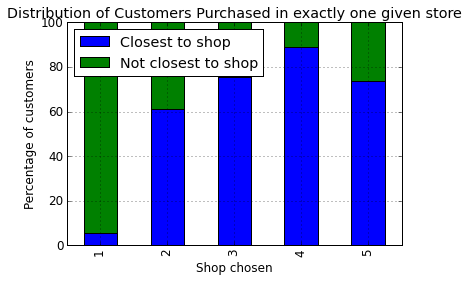

In [17]:
# Empty lists and dataframe
listA = [];listB = []
df_stack = pd.DataFrame()

# Auxiliary text to filter data of interest
text_ = 'amount_purchased_shop_'

# For each store...
for k in range(1,6):
    
    # Get number of customers that purchased in the store in turn and ONLY in that store...
    a =  sum((data[text_ + str(k)] != 0.) & (data.shops_used == 1))
    # ... and extract from them those who are closest to the store in turn
    b = sum((data[text_ + str(k)] != 0.) & (data.shops_used == 1) &
            (data.closest_shop == k))
    
    # From the previous to numbers get the fraction desired...
    fract_ = float(b)/float(a)

    # ... and store it, as well as its complement, in the corresponding
    # lists created before
    listA.append((1. - fract_)*100.)
    listB.append(fract_*100.)
    

# Create the corrsponding dataframe ...
df_stack['Closest to shop'] = listB
df_stack['Not closest to shop'] = listA
df_stack.index = range(1,6)

# ... and plot
df_stack.plot(kind='bar',
           title='Distribution of Customers Purchased in exactly one given store',stacked=True,
              grid=True)
plt.xlabel('Shop chosen')
plt.ylabel('Percentage of customers')
plt.show()

    


In [18]:
df_stack

,Closest to shop,Not closest to shop
1,5.571554,94.428446
2,60.971660,39.028340
3,75.278396,24.721604
4,89.121339,10.878661
5,73.619632,26.380368


This reveals that only **5.5% ** of customers who purchased in store 1 and store 1 only live the closest to it.

Let's do a similar analysis and determine, of the customers that purchased in ONLY one store and live the closest to a given store, the fraction that purchased in that particular store

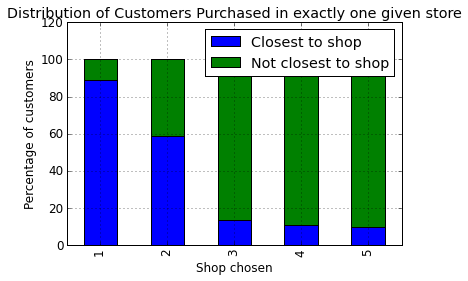

In [19]:
# PERCENTAGE OF ALL PEOPLE WHO PURCHASE AT ONLY ONE GIVEN SHOP AND ARE CLOSEST TO SUCH STORE

# Empty lists and dataframe
listA = [];listB = []
df_stack = pd.DataFrame()

# Auxiliary text to filter data of interest
text_ = 'amount_purchased_shop_'

# For each store...
for k in range(1,6):
    
    # Get number of customers that purchased ONLY in one store and live the closest
    # to the store in question
    a =  sum((data.closest_shop == k) & (data.shops_used == 1))
    # ... and extract from them those who purchased in that store
    b = sum((data[text_ + str(k)] != 0.) & (data.shops_used == 1) &
            (data.closest_shop == k))
    
    # From the previous to numbers get the fraction desired...
    fract_ = float(b)/float(a)

    # ... and store it, as well as its complement, in the corresponding
    # lists created before
    listA.append((1. - fract_)*100.)
    listB.append(fract_*100.)
    

# Create the corrsponding dataframe ...
df_stack['Closest to shop'] = listB
df_stack['Not closest to shop'] = listA
df_stack.index = range(1,6)

# ... and plot
df_stack.plot(kind='bar',
           title='Distribution of Customers Purchased in exactly one given store',stacked=True,
              grid=True)
plt.xlabel('Shop chosen')
plt.ylabel('Percentage of customers')
plt.show()

    


In [20]:
df_stack

,Closest to shop,Not closest to shop
1,88.822355,11.177645
2,58.644860,41.355140
3,13.784666,86.215334
4,11.219384,88.780616
5,10.033445,89.966555


Store 1 keeps getting our interst as **89%** of customers who purchased in only in one store and live the closest to that store, decided to purchase in that store. This percetange goes down to **60.0%** for store 2. A very dramatic situation is observed for stores 3, 4 and 5 as only **10%** of customers who live the closest to each corresponding store and purchased exclusively in one store, decided to purchase somewhere else.

To still have more insight about store 1 let's now focus on one-store-buyers and see how customers are distributed according to each store where they purchase and see how each segment is composed by buyers according to the distance to each store.

In [21]:
# auxiliar text
text_ = 'amount_purchased_shop_'
# Set empty list that will keep track of each component per segment
one_store = []
# List that will store lists containing contributions from each store
closest_to_X = []
# Set to zero cumulative sum. This will be only used
# as a check
cumul_num = 0
# For evert store...
for k in range(1,6):
    # Subset the dataset to determine the group of one-store-buyers that
    # purchased in the store in turn
    dfX = data[ (data[text_+str(k)] != 0.) & (data.shops_used == 1) ]
    # Get number of customers from the dataframe in turn
    numX = dfX.shape[0]
    # Save such value in the created list ...
    one_store.append(numX)
    # ... and update cumulative sum
    cumul_num += numX
    
    # Store the recently created list into the remaining empty list
    closest_to_X.append( [sum(dfX.closest_shop == n) for n in range(1,6)] )
    
# Create an empty dataframe
df_close = pd.DataFrame()
# populate first column with total number of one-store-buyers according to each store
df_close['Total customers'] = one_store
# Create auxiliary text to populate rest of columns
text_ = 'Closest to '
# For each store ...
for m in range(5):
    # ... populate the corresponding column ...
    df_close[text_+str(m+1)] = [closest_to_X[k][m] for k in range(5)]
# ... and set indices in dataframe
df_close.index = range(1,6)  



In [22]:
# We check cumulative sum agains total number of one-shop-buyers
print cumul_num 
print sum(data.shops_used == 1)

11710
11710


We check content of dataframe and create a stacked bar plot

In [23]:
df_close

,Total customers,Closest to 1,Closest to 2,Closest to 3,Closest to 4,Closest to 5
1,7987,445,1019,1557,3112,1854
2,2470,18,1506,519,196,231
3,449,10,18,338,36,47
4,478,4,9,19,426,20
5,326,24,16,19,27,240


In [24]:
df_stack = df_close[['Closest to 1','Closest to 2','Closest to 3',
                     'Closest to 4','Closest to 5']]

In [25]:
df_stack

,Closest to 1,Closest to 2,Closest to 3,Closest to 4,Closest to 5
1,445,1019,1557,3112,1854
2,18,1506,519,196,231
3,10,18,338,36,47
4,4,9,19,426,20
5,24,16,19,27,240


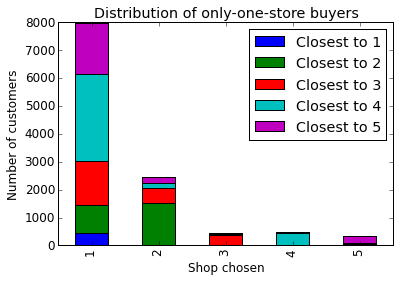

In [26]:

df_stack.plot(kind='bar',
           title='Distribution of only-one-store buyers',stacked=True)
plt.xlabel('Shop chosen')
plt.ylabel('Number of customers')
plt.show()

It is important to note that of the total group of one-shop buyers, almost **70%** of them buy in store 1 but less than **10%** of this group are the closest to the store. This, and all the previous analysis, sugests there is something about store 1 that makes it attractive. Let's do some extra analysis.

The data given do not provide information about the type of products offered in each store. With this limitation in mind let's explore the **maximum** number of **unique** products purchased in each store. Hopefully this will give us some insight about the variety of products offered in each store.

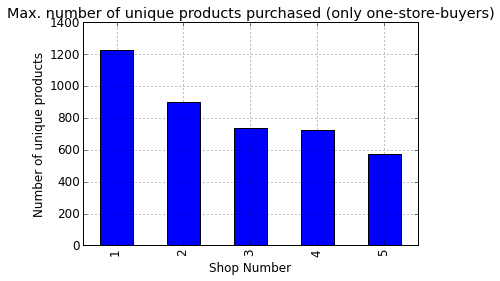

In [27]:
# Auxiliary texts for the processing
text_1 = 'unique_products_purchased_shop_'
text_2 = 'amount_purchased_shop_'
# Empty list to creat the needed dataframe
list_purchase = []
# For each store ...
for k in range(1,6):
    # ... we subset the dataset to find one-shop buyers and the individuals that purchased 
    # in the corresponding store
    aux_ = max(data[(data[text_2 + str(k)] != 0.) & (data.shops_used == 1) ][text_1 + str(k)].values)
    # Add such a number of the created list
    list_purchase.append(aux_)

# Create empty dataframe
dfAux = pd.DataFrame()
# Add columns
dfAux['Shop Number'] = [1,2,3,4,5]
dfAux['Number of unique products'] = list_purchase
# ... and index it
#dfAux.index = range(1,6)

# Generate the plot
dfAux.plot(x='Shop Number',y='Number of unique products',kind='bar',
           title='Max. number of unique products purchased (only one-store-buyers)',
           legend=False,grid=True)
plt.xlabel('Shop Number')
plt.ylabel('Number of unique products')
plt.show()



Based on the limited information we have, the previous bar plot suggests that store 1 offers the greatest variety of products, followed by stores 2 and 3. It would be nice to know the unique products that are found at each store as it may be the case that cutomers who do not find products in store 1 go to store 2 after to look for the missing products. This is only speculation as we do not have data to support this; this is something to keep in mind for further analyses. 

We now consider the group of customers that purchased in exactly two shops. From this group we consider those who purchased in store 1 and another store. 

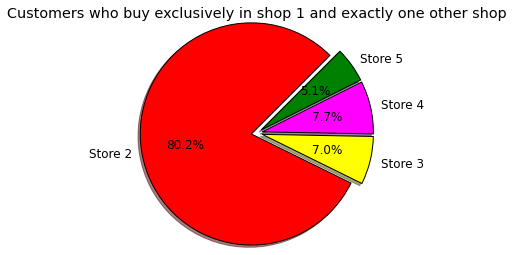

In [28]:
# Reference for pie chart: https://www.getdatajoy.com/examples/python-plots/pie-chart
list_purchase = []
labels_ = ["Store 2","Store 3","Store 4","Store 5"]
colors = ['red','yellow','magenta','green']
explode = (0.05,0.05,0.05,0.05)
text_ = 'avg_purchase_shop_'
num_ = sum((data['shops_used'] == 2) & (data['avg_purchase_shop_1'] != 0))

cumul_ = 0
for k in range(2,6):
    aux_ = sum((data[text_ + str(k)] != 0) & (data['shops_used'] == 2) & (data['avg_purchase_shop_1'] != 0))   
    cumul_ += aux_
    perc_ = float(aux_)*100./float(num_)
    list_purchase.append(perc_)

matplotlib.rcParams.update({'font.size': 12})
plt.pie(list_purchase,explode=explode,colors=colors,labels=labels_,
        autopct='%1.1f%%',shadow=True,startangle=45)

plt.axis('equal')

plt.title('Customers who buy exclusively in shop 1 and exactly one other shop')

plt.show()


From the previous chart we see that from the groupe who purchased in exactly two shops, one of them being shop 1, **80%** of them purchased in store 2. This suggests that shops 1 and 2 may have something interesting that is worth exploring further.

In what follows we consider the group of customers who purchased in exactly one store and write a function to perform AB tests on the proportion of customers who purchased in two given pair of shops.

In [29]:
def ABTest_Proportions(data,field_1,field_2,alpha_):
    acol = np.array(data[data.shops_used == 1][field_1].apply(lambda x: 1. if x !=0 else 0 ))
    bcol = np.array(data[data.shops_used == 1][field_2].apply(lambda x: 1. if x !=0 else 0 ))

    
    if ((len(acol) < 30) | (len(bcol) < 30)):
        print "Your samples do not seem to be large enough"
        return len(acol),len(bcol)
    else:
        # Compute proportions
        a_proportion = sum(acol)/len(acol)
        b_proportion = sum(bcol)/len(bcol)
        # Test statistic
        test_statistic = (a_proportion - b_proportion )
        # Pooled proportion
        pooled_proportion = (sum(acol) + sum(bcol))/(len(acol) + len(bcol)) 
        # Standard error
        SError = np.sqrt(pooled_proportion*(1-pooled_proportion)* (1./len(acol) + 1./len(bcol))  ) 
        # Z-score
        z_score = test_statistic / SError
        p_value = st.norm.sf(abs(z_score)) #one-sided
        print 'z score = ' , z_score
        print 'p value = ' , p_value
        print 'Null hypothesis is' , p_value > alpha_
        print "Difference in proportions between" , field_1 , "and" , field_2 
        if p_value > alpha_:
            print "may have been due to chance"
        else: 
            print "may NOT have been due to chance"
        print "######"*10

In [30]:
text_ = 'amount_purchased_shop_'
for i in range(1,6):
    for j in range(i+1,6):
        print "Comparing proportions for shops "  + str(i) + " and " + str(j)
        ABTest_Proportions(data,'amount_purchased_shop_'+str(i),'amount_purchased_shop_'+str(j),0.05)

Comparing proportions for shops 1 and 2
z score =  72.5170476884
p value =  0.0
Null hypothesis is False
Difference in proportions between amount_purchased_shop_1 and amount_purchased_shop_2
may NOT have been due to chance
############################################################
Comparing proportions for shops 1 and 3
z score =  102.604736824
p value =  0.0
Null hypothesis is False
Difference in proportions between amount_purchased_shop_1 and amount_purchased_shop_3
may NOT have been due to chance
############################################################
Comparing proportions for shops 1 and 4
z score =  102.133651649
p value =  0.0
Null hypothesis is False
Difference in proportions between amount_purchased_shop_1 and amount_purchased_shop_4
may NOT have been due to chance
############################################################
Comparing proportions for shops 1 and 5
z score =  104.619081505
p value =  0.0
Null hypothesis is False
Difference in proportions between amount_pu

Let's recall the distribution of number of unique products for only-one-shop buyers

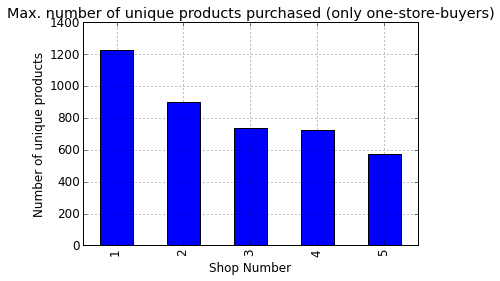

[1229, 899, 739, 725, 572]


In [31]:
# Auxiliary texts for the processing
text_1 = 'unique_products_purchased_shop_'
text_2 = 'amount_purchased_shop_'
# Empty list to creat the needed dataframe
list_purchase = []
# For each store ...
for k in range(1,6):
    # ... we subset the dataset to find one-shop buyers and the individuals that purchased 
    # in the corresponding store
    aux_ = max(data[(data[text_2 + str(k)] != 0.) & (data.shops_used == 1) ][text_1 + str(k)].values)
    # Add such a number of the created list
    list_purchase.append(aux_)

# Create empty dataframe
dfAux = pd.DataFrame()
# Add columns
dfAux['Shop Number'] = [1,2,3,4,5]
dfAux['Number of unique products'] = list_purchase
# ... and index it
#dfAux.index = range(1,6)

# Generate the plot
dfAux.plot(x='Shop Number',y='Number of unique products',kind='bar',
           title='Max. number of unique products purchased (only one-store-buyers)',
           legend=False,grid=True)
plt.xlabel('Shop Number')
plt.ylabel('Number of unique products')
plt.show()

print list_purchase

Our AB tests executed indicate that only in the pair of shops 3 and 4 the difference in proportion between these two groups may have been due to chance. This somehow is reflected in the previous bar plot as the difference in the number of unique products purchased in those two groups is only 14. In the other two pairs the difference in number of unique products is, at least, 150. This may indicate that the driver in customers' decisions in what shop to buy, more than anything else, is variety of products. It would be nice to have more information regarding the specific type of products offered in each store. 

Let's try to cluster customers based on unique number of proucts purchased in every store as well as the distance to every store. We first attempt to cluster customers who buy exclusively in only two stores.

In [78]:
# Important references: 
# https://www.quora.com/Is-it-possible-to-use-cross-validation-to-select-the-number-of-clusters-for-k-means-or-the-EM-algorithm-for-mixture-models-of-Gaussians
# http://www.statsoft.com/Textbook/Cluster-Analysis#vfold

# We import tools to split dataset into train and test sets
from sklearn.cross_validation import train_test_split

# We focus on customers who purchased exactly in only two shops and grab only unique products purchased in every store 
# as well as distance to each of them.
unique_2 = data[(data.shops_used == 2)][['unique_products_purchased_shop_1',
                                                                           'unique_products_purchased_shop_2',
                                         'unique_products_purchased_shop_3','unique_products_purchased_shop_4',
                                         'unique_products_purchased_shop_5']].values


#unique_2 = data[(data.shops_used == 2)][['unique_products_purchased_shop_1',
#                                                                           'unique_products_purchased_shop_2',
#                                         'unique_products_purchased_shop_3','unique_products_purchased_shop_4',
#                                         'unique_products_purchased_shop_5','distance_shop_1','distance_shop_2',
#                                                                           'distance_shop_3','distance_shop_4',
#                                                                           'distance_shop_5']].values


# We split dataset into training set (70%) and test set (30%)
train_2, test_2 = train_test_split(unique_2, train_size=0.7)
# We get an idea of the number of records in the training set
print train_2.shape

(17053, 5)


In [176]:
from sklearn import preprocessing

In [177]:
print train_2.mean(axis=0)
print train_2.std(axis=0)

[  210.77986278   148.3575324      9.3641588      6.81680643     6.46044684
  2812.95143521  2297.03370448  2060.61081883  3275.22232511  2297.84030372]
[  205.92134347   185.48616532    52.74291276    42.99194413    43.25536631
  1343.77092449  1445.61392571  1160.69332242  1842.4592502   1310.43459172]


In [178]:
train_2 = preprocessing.scale(train_2)
print train_2.mean(axis=0)
print train_2.std(axis=0)

[ -1.32578324e-16  -2.70659587e-16   7.36199024e-16   1.05903480e-15
  -4.23874010e-15  -1.78881780e-15   5.97064700e-15   9.54739718e-15
  -3.99294872e-15   1.74542613e-14]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


We now generate a plot to observe the percentage of variance explained versus the nuber of clusters. The idea is to determine the minumum number of cluster we need

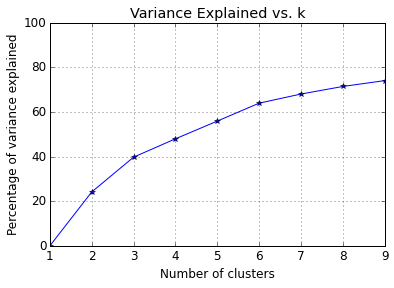

In [179]:
from scipy.spatial.distance import cdist, pdist
from matplotlib import pyplot as plt

# Determine your k range
k_range = range(1,10)

# Fit the kmeans model for each n_clusters = k
k_means_var = [KMeans(n_clusters=k).fit(train_2) for k in k_range]

# Pull out the cluster centers for each model
centroids = [X.cluster_centers_ for X in k_means_var]

# Calculate the Euclidean distance from 
# each point to each cluster center
k_euclid = [cdist(train_2, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke,axis=1) for ke in k_euclid]

# Total within-cluster sum of squares
wcss = [sum(d**2) for d in dist]

# The total sum of squares
tss = sum(pdist(train_2)**2)/train_2.shape[0]

# The between-cluster sum of squares
bss = tss - wcss

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, bss/tss*100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Variance Explained vs. k')


Motivated by the previous plot we observe that six clusters explain little over **60%** of the variance; we attempt then six clusters on the test set.

In [186]:
num_clusters = 6
k_means = KMeans(n_clusters=num_clusters)
kMeans = k_means.fit(train_2)
clusters_labels = kMeans.predict(train_2) + 1

df_clusters = pd.DataFrame()
df_clusters['shop_1'] = train_2[:,0]
df_clusters['shop_2'] = train_2[:,1]
df_clusters['shop_3'] = train_2[:,2]
df_clusters['shop_4'] = train_2[:,3]
df_clusters['shop_5'] = train_2[:,4]
df_clusters['cluster'] = clusters_labels

In [187]:
df_clusters.head()

,shop_1,shop_2,shop_3,shop_4,shop_5,cluster
0,-1.023594,-0.708180,-0.177543,0.097302,-0.149356,2
1,0.127331,-0.740527,-0.177543,-0.158560,-0.149356,2
2,-0.703083,-0.799831,-0.177543,0.097302,-0.149356,2
3,-0.727364,-0.535660,-0.177543,-0.158560,-0.149356,1
4,0.530397,0.477893,-0.177543,-0.158560,-0.149356,1


We now plot the clusters in a bar plot

In [188]:
matrix_clusters = np.zeros((num_clusters,5))
for m in range(num_clusters):
    #print "Cluster " , m+1
    for k in range(5):
        text = 'shop_' + str(k+1) 
        sum_ = sum((df_clusters.cluster == m+1) & (df_clusters['shop_'+str(k+1)] != 0 ))
        #print text, sum_
        matrix_clusters[m,k] = sum_
    #print "#######"*2

    
df = pd.DataFrame()
for k in range(5):
    df['Shop ' + str(k+1)] = matrix_clusters[:,k]
df.index = range(1,num_clusters+1) #['Cluster '+ str(i) for i in range(1,6)]


In [189]:
df

,Shop 1,Shop 2,Shop 3,Shop 4,Shop 5
1,7168,7168,7168,7168,7168
2,7149,7149,7149,7149,7149
3,342,342,342,342,342
4,254,254,254,254,254
5,257,257,257,257,257
6,1883,1883,1883,1883,1883


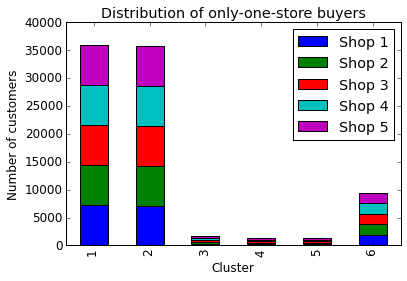

In [190]:
df.plot(kind='bar',
           title='Distribution of only-one-store buyers',stacked=True)
plt.xlabel('Cluster')
plt.ylabel('Number of customers')
plt.show()

We observe that although all clusters are dominated mostly by stores 1 and 2, all clusters still contain a mix of all shops. Just to get a feeling of the impact of distances on clusters, let's now attempt to use distances as features.

In [192]:
# Important references: 
# https://www.quora.com/Is-it-possible-to-use-cross-validation-to-select-the-number-of-clusters-for-k-means-or-the-EM-algorithm-for-mixture-models-of-Gaussians
# http://www.statsoft.com/Textbook/Cluster-Analysis#vfold

# We import tools to split dataset into train and test sets
from sklearn.cross_validation import train_test_split

# We focus on customers who purchased exactly in only two shops and grab only unique products purchased in every store 
# as well as distance to each of them.


unique_2 = data[(data.shops_used == 2)][['distance_shop_1','distance_shop_2',
                                                                           'distance_shop_3','distance_shop_4',
                                                                           'distance_shop_5']].values


#unique_2 = data[(data.shops_used == 2)][['unique_products_purchased_shop_1',
#                                                                           'unique_products_purchased_shop_2',
#                                         'unique_products_purchased_shop_3','unique_products_purchased_shop_4',
#                                         'unique_products_purchased_shop_5','distance_shop_1','distance_shop_2',
#                                                                           'distance_shop_3','distance_shop_4',
#                                                                           'distance_shop_5']].values


# We split dataset into training set (70%) and test set (30%)
train_2, test_2 = train_test_split(unique_2, train_size=0.7)
# We get an idea of the number of records in the training set
print train_2.shape

(17053, 5)


In [193]:
print train_2.mean(axis=0)
print train_2.std(axis=0)
train_2 = preprocessing.scale(train_2)
print train_2.mean(axis=0)
print train_2.std(axis=0)

[ 2806.76972145  2302.17592042  2059.18007348  3262.58250234  2292.3560294 ]
[ 1337.44697397  1439.86166609  1150.80710911  1839.75982779  1302.03440221]
[ -2.03188314e-15   1.60608673e-14   5.60704376e-16   2.10661775e-15
   4.82653233e-15]
[ 1.  1.  1.  1.  1.]


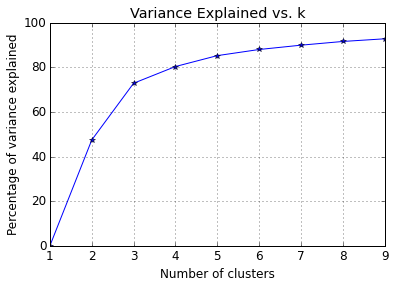

In [194]:
from scipy.spatial.distance import cdist, pdist
from matplotlib import pyplot as plt

# Determine your k range
k_range = range(1,10)

# Fit the kmeans model for each n_clusters = k
k_means_var = [KMeans(n_clusters=k).fit(train_2) for k in k_range]

# Pull out the cluster centers for each model
centroids = [X.cluster_centers_ for X in k_means_var]

# Calculate the Euclidean distance from 
# each point to each cluster center
k_euclid = [cdist(train_2, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke,axis=1) for ke in k_euclid]

# Total within-cluster sum of squares
wcss = [sum(d**2) for d in dist]

# The total sum of squares
tss = sum(pdist(train_2)**2)/train_2.shape[0]

# The between-cluster sum of squares
bss = tss - wcss

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, bss/tss*100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Variance Explained vs. k')


In [195]:
num_clusters = 6
k_means = KMeans(n_clusters=num_clusters)
kMeans = k_means.fit(test_1)
clusters_labels = kMeans.predict(test_1) + 1

df_clusters = pd.DataFrame()
df_clusters['shop_1'] = test_1[:,0]
df_clusters['shop_2'] = test_1[:,1]
df_clusters['shop_3'] = test_1[:,2]
df_clusters['shop_4'] = test_1[:,3]
df_clusters['shop_5'] = test_1[:,4]
df_clusters['cluster'] = clusters_labels

In [196]:
df_clusters.head()

,shop_1,shop_2,shop_3,shop_4,shop_5,cluster
0,149,0,0,33,0,1
1,99,714,0,0,0,2
2,300,205,0,0,0,2
3,124,429,0,0,0,2
4,194,94,0,0,0,6


In [197]:
matrix_clusters = np.zeros((num_clusters,5))
for m in range(num_clusters):
    #print "Cluster " , m+1
    for k in range(5):
        text = 'shop_' + str(k+1) 
        sum_ = sum((df_clusters.cluster == m+1) & (df_clusters['shop_'+str(k+1)] != 0 ))
        #print text, sum_
        matrix_clusters[m,k] = sum_
    #print "#######"*2

    
df = pd.DataFrame()
for k in range(5):
    df['Shop ' + str(k+1)] = matrix_clusters[:,k]
df.index = range(1,num_clusters+1) #['Cluster '+ str(i) for i in range(1,6)]


In [198]:
df

,Shop 1,Shop 2,Shop 3,Shop 4,Shop 5
1,1296,762,90,488,66
2,2427,2417,64,28,22
3,1536,1318,334,40,32
4,676,679,9,1,3
5,124,84,10,25,9
6,966,588,164,51,309


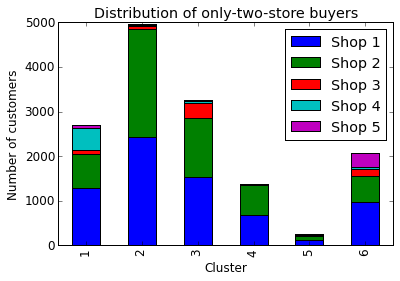

In [199]:
df.plot(kind='bar',
           title='Distribution of only-two-store buyers',stacked=True)
plt.xlabel('Cluster')
plt.ylabel('Number of customers')
plt.show()

We observe something similar as before. Let's now then try to do PCA before clustering. The motivation for doing this is that from our previous analysis we oberved that both, distance and unique number of items purchased, were identified as important features for our analysis.

In [201]:
from sklearn.decomposition import PCA


unique_2 = data[(data.shops_used == 2)][['unique_products_purchased_shop_1',
                                                                           'unique_products_purchased_shop_2',
                                         'unique_products_purchased_shop_3','unique_products_purchased_shop_4',
                                         'unique_products_purchased_shop_5','distance_shop_1','distance_shop_2',
                                                                           'distance_shop_3','distance_shop_4',
                                                                           'distance_shop_5']].values


# We split dataset into training set (70%) and test set (30%)
train_2, test_2 = train_test_split(unique_2, train_size=0.7)
# We get an idea of the number of records in the training set
print train_2.shape

print "Feature normalization"
print ""
print train_2.mean(axis=0)
print train_2.std(axis=0)
train_2 = preprocessing.scale(train_2)
print train_2.mean(axis=0)
print train_2.std(axis=0)

(17053, 10)
Feature normalization

[  211.54483082   147.08473582     9.18946813     7.26921949     5.85398464
  2802.1783327   2306.04320041  2060.02434191  3258.82134136  2290.20392037]
[  206.94192027   186.04711004    51.05829684    44.33751486    40.0670379
  1334.41900746  1444.61717945  1151.66566068  1838.15101122  1301.35595683]
[ -2.97819459e-17   2.53463923e-16  -5.04281358e-16   1.16786309e-15
  -1.34940958e-15   3.29932788e-15   5.99704027e-15  -1.54135649e-15
  -1.48172098e-14   4.50274115e-15]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


Let's now do PCA in **all** components with the idea of seeing what is the minimum number of components we wish to retain for a desired variance

In [203]:
# Number of components to consider
comp_ = 10

# Generate model
pca = PCA(n_components=comp_)

# Fit model
pca2 = pca.fit_transform(train_2)

# Print out useful information reagarding the variance captured by the 
# number of components chosen


#print pca.explained_variance_
#print "Ratio of explained variance"
#print pca.explained_variance_ratio_
print "Cumulative sum of ratio of explained variance"
pca_results = pca.explained_variance_ratio_.cumsum()
for k in range(10):
    print round(pca_results[k]*100.,2), "% explained by " +str(k+1)+ " components"


Cumulative sum of ratio of explained variance
35.81 % explained by 1 components
54.64 % explained by 2 components
65.62 % explained by 3 components
75.63 % explained by 4 components
85.27 % explained by 5 components
93.42 % explained by 6 components
99.07 % explained by 7 components
99.55 % explained by 8 components
99.95 % explained by 9 components
100.0 % explained by 10 components


We see that **six components** capture **93%** of the variance. This is a very high variance for a little number of compnents. Let's proceed with two components then.

In [204]:
# Number of components to consider
comp_ = 6

# Generate model
pca = PCA(n_components=comp_)

# Fit model
pca2 = pca.fit_transform(train_2)

# Print out useful information reagarding the variance captured by the 
# number of components chosen


#print pca.explained_variance_
print "Ratio of explained variance"
print pca.explained_variance_ratio_
print "Cumulative sum of ratio of explained variance"
print pca.explained_variance_ratio_.cumsum()


Ratio of explained variance
[ 0.3581287   0.18825483  0.1097805   0.10012628  0.09643532  0.08146531]
Cumulative sum of ratio of explained variance
[ 0.3581287   0.54638354  0.65616403  0.75629031  0.85272563  0.93419094]


And we do clustering with the results of this PCA analysis

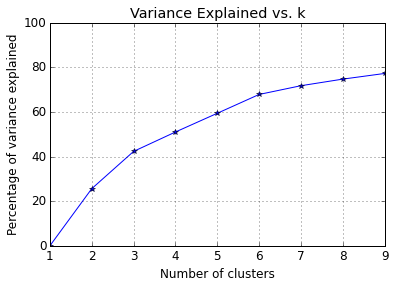

In [205]:
# Determine your k range
k_range = range(1,10)

# Fit the kmeans model for each n_clusters = k
k_means_var = [KMeans(n_clusters=k).fit(pca2) for k in k_range]

# Pull out the cluster centers for each model
centroids = [X.cluster_centers_ for X in k_means_var]

# Calculate the Euclidean distance from 
# each point to each cluster center
k_euclid = [cdist(pca2, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke,axis=1) for ke in k_euclid]

# Total within-cluster sum of squares
wcss = [sum(d**2) for d in dist]

# The total sum of squares
tss = sum(pdist(pca2)**2)/pca2.shape[0]

# The between-cluster sum of squares
bss = tss - wcss

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, bss/tss*100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Variance Explained vs. k')

In [211]:
num_clusters = 6
k_means = KMeans(n_clusters=num_clusters)
kMeans = k_means.fit(pca2)
clusters_labels = kMeans.predict(pca2) + 1


df_clusters = pd.DataFrame()
for k in range(comp_):
    df_clusters['comp_' + str(k+1)] = pca2[:,k]
    df_clusters['comp_' + str(k+1)] = pca2[:,k]
df_clusters['cluster'] = clusters_labels

In [212]:
df_clusters.head()

,comp_1,comp_2,comp_3,comp_4,comp_5,comp_6,cluster
0,2.063184,-0.639488,-1.515240,0.277937,-0.870623,0.180735,3
1,-1.462325,-0.015862,0.670935,-0.201720,0.208575,0.304002,1
2,0.641775,-0.078823,-1.070430,0.202867,-0.558140,0.002941,3
3,0.663157,-0.206809,-0.645153,0.128926,-0.332606,0.208868,3
4,1.544060,-0.436179,-0.843145,0.254127,-0.007969,0.359967,3


In [218]:
matrix_clusters = np.zeros((num_clusters,comp_))
for m in range(num_clusters):
    #print "Cluster " , m+1
    for k in range(comp_):
        text = 'shop_' + str(k+1) 
        sum_ = sum((df_clusters.cluster == m+1) & (df_clusters['comp_'+str(k+1)] != 0 ))
        #print text, sum_
        matrix_clusters[m,k] = sum_
    #print "#######"*2

    
df = pd.DataFrame()
for k in range(comp_):
    df['Comp ' + str(k+1)] = matrix_clusters[:,k]
df.index = range(1,num_clusters+1) #['Cluster '+ str(i) for i in range(1,6)]


In [219]:
df

,Comp 1,Comp 2,Comp 3,Comp 4,Comp 5,Comp 6
1,7090,7090,7090,7090,7090,7090
2,1886,1886,1886,1886,1886,1886
3,7224,7224,7224,7224,7224,7224
4,288,288,288,288,288,288
5,338,338,338,338,338,338
6,227,227,227,227,227,227


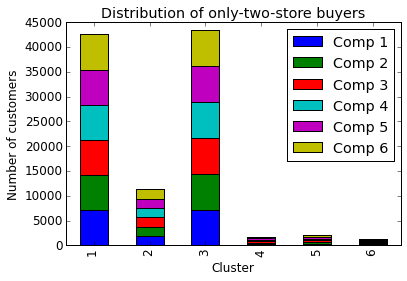

In [220]:
df.plot(kind='bar',
           title='Distribution of only-two-store buyers',stacked=True)
plt.xlabel('Cluster')
plt.ylabel('Number of customers')
plt.show()

In [222]:
# Reference 
# http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html

In [261]:

#unique_2 = data[(data.shops_used == 2)][['unique_products_purchased_shop_1',
#                                         'unique_products_purchased_shop_2',
#                                         'unique_products_purchased_shop_3',
#                                         'unique_products_purchased_shop_4',
#                                         'unique_products_purchased_shop_5',
#                                         'distance_shop_1','distance_shop_2',
#                                         'distance_shop_3','distance_shop_4',
#                                         'distance_shop_5']].values

unique_2 = data[(data.shops_used == 2)][['unique_products_purchased_shop_1',
                                         'unique_products_purchased_shop_2',
                                         'unique_products_purchased_shop_3',
                                         'unique_products_purchased_shop_4',
                                         'unique_products_purchased_shop_5',
                                         'distance_shop_1','distance_shop_2',
                                         'distance_shop_3','distance_shop_4',
                                         'distance_shop_5']].values

#unique_2 = data[(data.shops_used == 1)].values

unique_2 = unique_2.astype(float)
# We split dataset into training set (70%) and test set (30%)
train_2, test_2 = train_test_split(unique_2, train_size=0.7)
# We get an idea of the number of records in the training set
print train_2.shape

print "Feature normalization"
print ""
print train_2.mean(axis=0)
print train_2.std(axis=0)
train_2 = preprocessing.scale(train_2)
print train_2.mean(axis=0)
print train_2.std(axis=0)

(17053, 10)
Feature normalization

[  211.8081276    147.21069607     9.34562834     6.89866886     6.24869524
  2811.79722495  2307.57681475  2065.64285397  3268.44448357  2298.76782994]
[  206.7586731    184.46159011    52.49062537    42.97489165    43.33526427
  1344.00634101  1443.08585311  1158.63235318  1847.32380365  1309.60660219]
[  2.53450902e-17  -3.19987461e-17   8.60922519e-16   9.90704616e-16
  -8.31993439e-16   2.47980191e-15   5.99122646e-15  -5.53819193e-15
  -3.57453663e-15  -7.39723189e-15]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [262]:
# Number of components to consider
comp_ = 10

# Generate model
pca = PCA(n_components=comp_)

# Fit model
pca2 = pca.fit_transform(train_2)

# Print out useful information reagarding the variance captured by the 
# number of components chosen


#print pca.explained_variance_
#print "Ratio of explained variance"
#print pca.explained_variance_ratio_
print "Cumulative sum of ratio of explained variance"
pca_results = pca.explained_variance_ratio_.cumsum()
for k in range(comp_):
    print round(pca_results[k]*100.,3), "% explained by " +str(k+1)+ " components"


Cumulative sum of ratio of explained variance
35.864 % explained by 1 components
54.627 % explained by 2 components
65.59 % explained by 3 components
75.617 % explained by 4 components
85.303 % explained by 5 components
93.442 % explained by 6 components
99.081 % explained by 7 components
99.558 % explained by 8 components
99.949 % explained by 9 components
100.0 % explained by 10 components
